## Analyze NBA Trends for 2010 and 2014 seasons

A practice project for my Codecademy professional certification in Data Science and ML Engineering

Robert Hall 01/04/2024

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# read-in data file
nba = pd.read_csv('nba_games.csv')

In [6]:
# create new dataframes for seasons 2010 and 2014
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

Step 1: 

Compare knicks games to those of the nets, with respect to the amount of points earned per game. Create two Series; one for the points of each game the Knicks played in 2010, and another for the points of each game the Nets played in 2010.

In [7]:
knicks_pts_10 = nba_2010.pts[nba_2010.fran_id == 'Knicks']
nets_pts_10 = nba_2010.pts[nba_2010.fran_id == 'Nets']

In [8]:
print(knicks_pts_10.head())

21719     93
21725    100
21728    127
21734    117
21739     89
Name: pts, dtype: int64


In [9]:
print(nets_pts_10.head())

21720     93
21727     85
21730    104
21733     68
21738     94
Name: pts, dtype: int64


Step 2:

Calculate the difference between the teams average points scored. Does one team appear to be associated with higher score average?

In [10]:
knicks_mean_score = round(np.mean(knicks_pts_10), 2)
nets_mean_score = round(np.mean(nets_pts_10), 2)
diff_means_2010 = round(abs(knicks_mean_score - nets_mean_score), 2)

In [13]:
print("Knicks Average Score 2010:           " + str(knicks_mean_score))
print("Nets Average Score 2010:             " + str(nets_mean_score))
print("Difference in Average Scores 2010:   "+ str(diff_means_2010))

Knicks Average Score 2010:           102.11
Nets Average Score 2010:             92.38
Difference in Average Scores 2010:   9.73


Step 3:

Create an overlapping histogram plot to visualize the difference in score distributions between the two teams during the 2010 season.

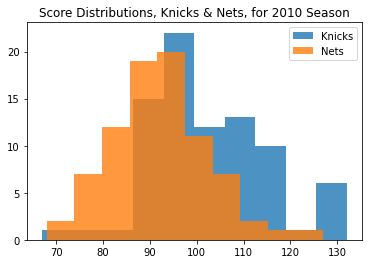

<Figure size 432x288 with 0 Axes>

In [17]:
plt.hist(knicks_pts_10, 
         alpha=0.8, 
         label='Knicks')
plt.hist(nets_pts_10, 
         alpha=0.8, 
         label='Nets')
plt.legend()
plt.title("Score Distributions, Knicks & Nets, for 2010 Season")
plt.show()
plt.clf()

Step 4: 

Compare knicks games to those of the nets, with respect to the amount of points earned per game. Create two Series; one for the points of each game the Knicks played in 2010, and another for the points of each game the Nets played in 2014.

In [18]:
knicks_pts_14 = nba_2014.pts[nba_2014.fran_id == 'Knicks']
nets_pts_14 = nba_2014.pts[nba_2014.fran_id == 'Nets']

In [20]:
print(knicks_pts_14.head())

23469     90
23473     81
23480    100
23486     97
23490    101
Name: pts, dtype: int64


In [21]:
print(nets_pts_14.head())

23468     94
23475    101
23482     86
23484    104
23494    108
Name: pts, dtype: int64


Step 5:

Calculate the difference between the teams average points scored during 2014. Does one team appear to be associated with higher score average?

In [22]:
knicks_mean_score_14 = round(np.mean(knicks_pts_14), 2)
nets_mean_score_14 = round(np.mean(nets_pts_14), 2)
diff_means_2014 = round(abs(knicks_mean_score_14 - nets_mean_score_14), 2)

In [24]:
print("Knicks Average Score 2014:           " + str(knicks_mean_score_14))
print("Nets Average Score 2014:             " + str(nets_mean_score_14))
print("Average Difference in Score 2014:    " + str(diff_means_2014))

Knicks Average Score 2014:           98.59
Nets Average Score 2014:             98.14
Average Difference in Score 2014:    0.45


Step 6:

Create an overlapping histogram plot to visualize the difference in score distributions between the two teams during the 2014 season.

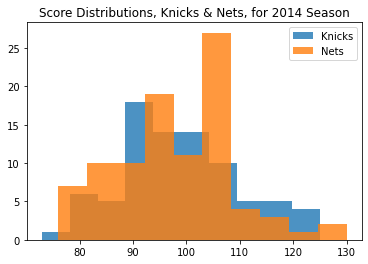

<Figure size 432x288 with 0 Axes>

In [25]:
plt.hist(knicks_pts_14, 
         alpha=0.8, 
         label='Knicks')
plt.hist(nets_pts_14, 
         alpha=0.8, 
         label='Nets')
plt.legend()
plt.title("Score Distributions, Knicks & Nets, for 2014 Season")
plt.show()
plt.clf()

Step 7: 

Generate side-by-side boxplots to visualize the distribution of points scored between the Knicks and the Nets in the 2010 season.


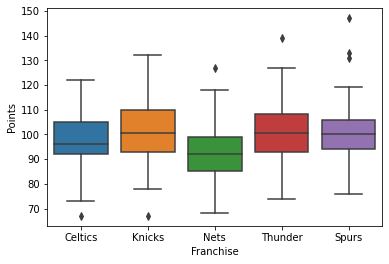

In [26]:
sns.boxplot(data=nba_2010, 
            x='fran_id', 
            y='pts')
plt.xlabel("Franchise")
plt.ylabel("Points")
plt.show()